In [ ]:
"""
Autor: José Carlos Dávila Almazán
Date: 31/09/2021
"""

In [177]:
#Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Visualisation
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# Configure visualisations
#matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

credit_reports = pd.read_csv("credit_reports.csv",encoding='utf-8')
users = pd.read_csv("users.csv",encoding='utf-8')
#credit_reports.head()
#users.head()

In [47]:
#Analizying the structre of credit_reports.csv
print("Shapes of credit reports")
print(credit_reports.shape)
print("Data types of credit reports")
print(credit_reports.dtypes)
print("Data description for credit reports")
credit_reports.describe()

Shapes of credit reports
(16309, 17)
Data types of credit reports
user_id                                 int64
institution                            object
account_type                           object
credit_type                            object
total_credit_payments                 float64
payment_frequency                      object
amount_to_pay_next_payment            float64
account_opening_date                   object
account_closing_date                   object
maximum_credit_amount                 float64
current_balance                       float64
credit_limit                          float64
past_due_balance                      float64
number_of_payments_due                float64
worst_delinquency                     float64
worst_delinquency_date                 object
worst_delinquency_past_due_balance    float64
dtype: object
Data description for credit reports


,user_id,total_credit_payments,amount_to_pay_next_payment,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_past_due_balance
count,16309.000000,16268.000000,1.630400e+04,1.630700e+04,1.630400e+04,1.629600e+04,1.630400e+04,16297.000000,16255.000000,1.629700e+04
mean,474.067631,22.405766,2.779242e+03,3.994739e+04,1.993377e+04,2.398115e+04,3.618910e+03,2.291219,1.541618,1.617189e+03
std,293.165091,77.413143,2.145046e+04,1.337402e+05,1.067213e+05,9.429967e+04,2.816734e+04,8.250868,6.816558,2.845180e+04
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,213.000000,0.000000,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,466.000000,1.000000,0.000000e+00,6.899000e+03,0.000000e+00,8.925000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00
75%,726.000000,16.000000,5.830000e+02,2.634750e+04,3.224250e+03,1.440600e+04,0.000000e+00,0.000000,0.000000,0.000000e+00
max,999.000000,1800.000000,1.263964e+06,4.883200e+06,4.697583e+06,3.269355e+06,1.915973e+06,96.000000,84.000000,3.234351e+06


In [48]:
#Analizying  the structure of users.csv
print("Shapes of users\n")
print(users.shape)
print("Data types of users")
print(users.dtypes)
print("Data description for credit users")
users.describe()

Shapes of users

(1000, 4)
Data types of users
id                 int64
monthly_income     int64
monthly_outcome    int64
class              int64
dtype: object
Data description for credit users


,id,monthly_income,monthly_outcome,class
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,499.500000,1.216138e+05,1.249657e+05,0.535000
std,288.819436,4.709416e+05,5.796281e+05,0.499023
min,0.000000,1.000000e+00,1.000000e+00,0.000000
25%,249.750000,2.691250e+03,3.397750e+03,0.000000
50%,499.500000,1.253350e+04,1.424250e+04,1.000000
75%,749.250000,5.868600e+04,5.722850e+04,1.000000
max,999.000000,9.344842e+06,9.749651e+06,1.000000


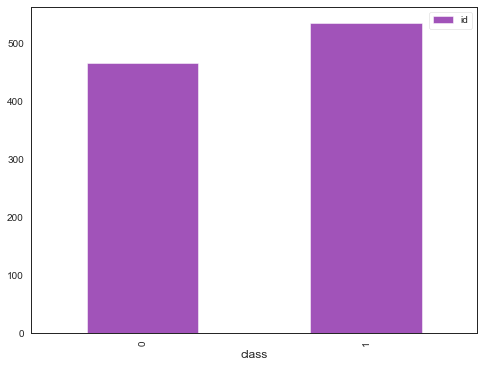

In [30]:
#Good and bad users
usersgp_cl=users.groupby("class").agg({
    "id":"count"
})
usersgp_cl.head()
#0=465; 1=535 53%
ugraph1=usersgp_cl.plot.bar(color={"id":"#A153B9"})



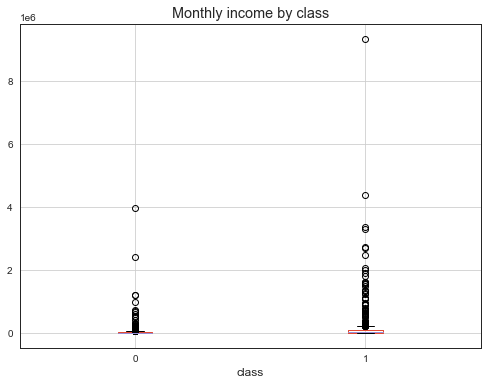

In [31]:
#Monthly income by class
fig_mi_bc=users.boxplot(column= "monthly_income", by ="class")
title_boxplot = 'Monthly income by class'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

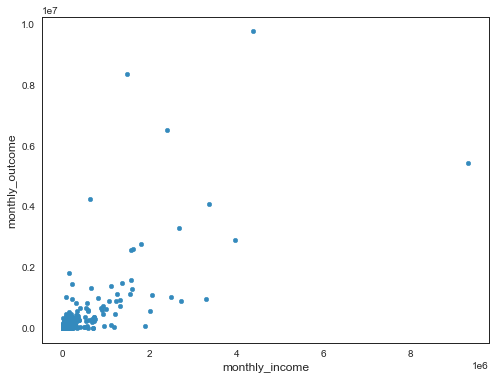

In [32]:
#Income/Outcome
def incomeoutcome(fila):
    result=fila["monthly_income"]-fila["monthly_outcome"]
    return result
users["monthly available"]=users.apply(incomeoutcome,axis=1)
users.head()

users.plot(kind="scatter",x="monthly_income", y="monthly_outcome")
plt.show()



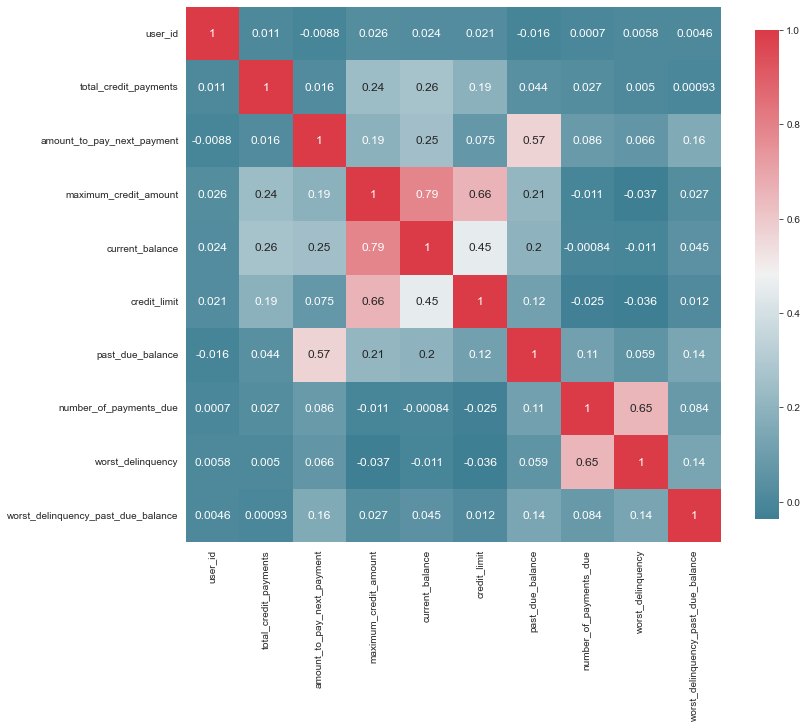

In [43]:
#Correlation graph
def plot_correlation_map( df ):
    corr = credit_reports.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


plot_correlation_map( credit_reports )


In [104]:
#Data preparation

clean_cr=credit_reports
clean_u=users
#Cleaning typos of accents
clean_cr=clean_cr.replace('é','e', regex=True)
clean_cr=clean_cr.replace('í','i', regex=True)
clean_cr=clean_cr.replace('ó','o', regex=True)
clean_cr=clean_cr.replace('ú','u', regex=True)
#clean_cr

#Unifying date format
clean_cr['account_opening_date'] = pd.to_datetime(clean_cr['account_opening_date'],format = '%x')
clean_cr['account_closing_date'] = pd.to_datetime(clean_cr['account_closing_date'],format = '%x')
clean_cr=clean_cr.replace('0000-00-00',None, regex=True)
clean_cr['worst_delinquency_date'] = pd.to_datetime(clean_cr['worst_delinquency_date'],format = '%x')
#clean_cr

#Converting categorical to non-categorical
clean_cr["institution"] = clean_cr["institution"].astype('category')
clean_cr["institution_cat"]=clean_cr["institution"].cat.codes
clean_cr["account_type"] = clean_cr["account_type"].astype('category')
clean_cr["account_type_cat"]=clean_cr["account_type"].cat.codes
clean_cr["credit_type"] = clean_cr["credit_type"].astype('category')
clean_cr["credit_type_cat"]=clean_cr["credit_type"].cat.codes
clean_cr["payment_frequency"] = clean_cr["payment_frequency"].astype('category')
clean_cr["payment_frequency_cat"]=clean_cr["payment_frequency"].cat.codes
clean_cr

#Saving clean dataset
clean_cr.to_csv("clean_credit_records.csv",encoding='utf-8')

#Reduced dataset
reduced_cr=clean_cr
reduced_cr=reduced_cr.drop(columns=['institution','account_type','credit_type','total_credit_payments','payment_frequency'])
reduced_cr.to_csv("reduced_credit_records.csv",encoding='utf-8')

Shapes of credit reports
(16309, 16)
Data types of credit reports
user_id                                        int64
amount_to_pay_next_payment                   float64
account_opening_date                  datetime64[ns]
account_closing_date                  datetime64[ns]
maximum_credit_amount                        float64
current_balance                              float64
credit_limit                                 float64
past_due_balance                             float64
number_of_payments_due                       float64
worst_delinquency                            float64
worst_delinquency_date                datetime64[ns]
worst_delinquency_past_due_balance           float64
institution_cat                                 int8
account_type_cat                                int8
credit_type_cat                                 int8
payment_frequency_cat                           int8
dtype: object
Data description for credit reports
            user_id  amount_to_pay_n

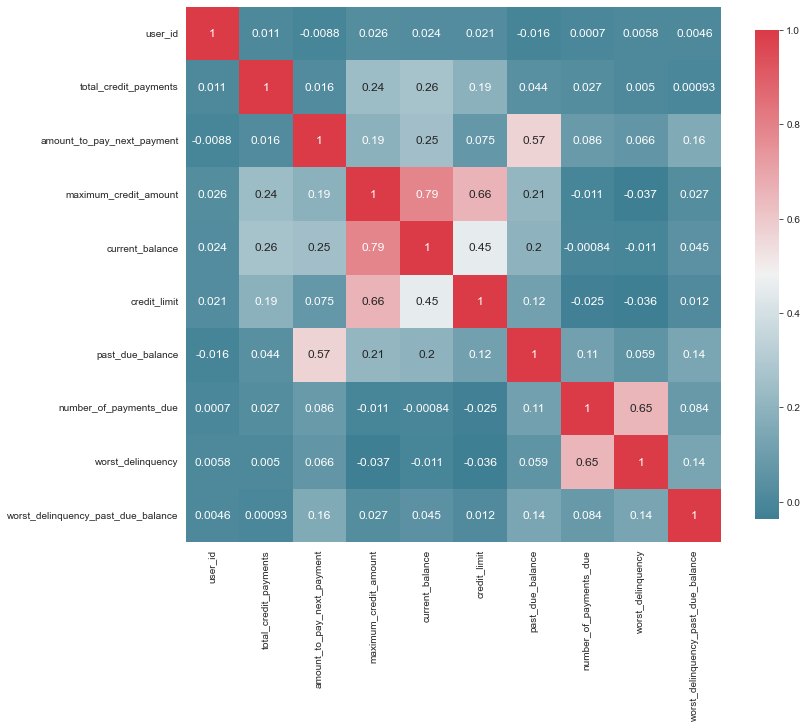

In [176]:
#Review of clean and reduced data
print("Shapes of credit reports")
print(reduced_cr.shape)
print("Data types of credit reports")
print(reduced_cr.dtypes)
print("Data description for credit reports")
print(reduced_cr.describe())

#Correlation graph 2
def plot_correlation_map2( df ):
    corr = reduced_cr.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


plot_correlation_map( reduced_cr )

In [170]:
#Modeling
#Knockout rule 1: Every user that was classidfied with '0' in users.csv is discarded 
fil_users=users[users['class'] == 1]
#Knockout rule 2: Every user which outcome is higher than its income is discarded
fil_users=fil_users[fil_users.monthly_income.gt(fil_users.monthly_outcome)] 
#Knockout rule 3: Only users that passed previous knockout rules remain on the reduced credit reports
fil_cr=reduced_cr[reduced_cr.user_id.isin(fil_users.id)]
fil_cr.to_csv("kickout_credit_records.csv",encoding='utf-8')
#Knockout rule 4: Worst delinquency lower than 10
gp_cr=fil_cr.groupby('user_id').sum('worst_delinquency')
gp_cr=gp_cr[gp_cr['worst_delinquency']<10]
gp_cr.to_csv("Users_kickout_pass.csv",encoding='utf-8')
#gp_cr
#From a total of 1000 clients, only 175 are suitable to get a loan
#no_clients_app=fil_cr['user_id'].nunique()
#no_clients_app

In [189]:
#Modeling 2nd part
gp_cr2=pd.read_csv("Users_kickout_pass.csv",encoding='utf-8')
m_dset=fil_cr[fil_cr.user_id.isin(gp_cr2.user_id)]
m_dset.to_csv("Model_Dataset.csv",encoding='utf-8')


In [192]:
#Lineal Regression
m_dset['account_opening_date']=pd.to_datetime(m_dset['account_opening_date'],format= "%d%m%Y")


,user_id,amount_to_pay_next_payment,account_opening_date,account_closing_date,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_date,worst_delinquency_past_due_balance,institution_cat,account_type_cat,credit_type_cat,payment_frequency_cat
34,4,0.0,2012-05-28,2016-06-22,16469.0,0.0,0.0,6852.0,0.0,0.0,NaT,0.0,5,6,25,4
35,4,0.0,2012-05-28,2016-01-31,8725.0,0.0,12500.0,0.0,0.0,0.0,NaT,0.0,5,6,25,4
36,4,0.0,2012-05-01,2015-06-10,37543.0,0.0,30000.0,11634.0,0.0,0.0,NaT,0.0,5,6,25,4
37,4,0.0,2012-09-01,2014-10-27,0.0,0.0,48000.0,0.0,0.0,0.0,NaT,0.0,5,6,25,4
38,4,0.0,2012-05-28,2014-09-30,8084.0,0.0,12500.0,0.0,0.0,0.0,NaT,0.0,5,6,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16182,998,0.0,2009-11-01,2013-03-07,3092.0,0.0,3000.0,0.0,0.0,0.0,NaT,0.0,5,6,25,4
16183,998,0.0,2009-10-04,2013-03-14,19289.0,0.0,20000.0,0.0,0.0,0.0,NaT,0.0,5,6,25,4
16184,998,0.0,2010-10-15,2012-11-30,1886.0,0.0,2550.0,0.0,0.0,0.0,NaT,0.0,16,7,14,4
16185,998,0.0,2011-05-28,2012-05-28,9000.0,0.0,9000.0,0.0,1.0,0.0,NaT,0.0,5,4,14,4
